In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

import random


In [ ]:
# Set the random seed
seed_value = 100
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/dogs-vs-cats-vvsmall.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Set data directories
base_dir = ('/tmp/dogs-vs-cats-vvsmall')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [ ]:
train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')
validation_cat_dir = os.path.join(validation_dir, 'cats')
validation_cat_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
 ''' # unzip file
import shutil
shutil.unpack_archive('/content/gdrive/MyDrive/Colab Notebooks/train.zip') '''

In [ ]:
 ''' # unzip file
import shutil
shutil.unpack_archive('/content/gdrive/MyDrive/Colab Notebooks/validation.zip') '''

In [ ]:
''' # Set data directories
train_dir = ('/content/train')
validation_dir = ('/content/validation')  '''

In [ ]:
# Set image dimensions and batch size
img_width = 150
img_height = 150
batch_size = 128

##Data Augmentation

In [ ]:

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

This code initializes an instance of the ImageDataGenerator class from the Keras library, which is used for data augmentation on images during training. The parameters passed to the ImageDataGenerator specify the types of augmentations to apply to the images.

1. The 'rescale' parameter rescales the pixel values of the images to be in the range of [0,1].


2. The 'rotation_range' parameter specifies the range of degrees to randomly rotate the image.

3. The 'width_shift_range' and 'height_shift_range' parameters specify the range of values to randomly shift the image horizontally and vertically, respectively.

4. The 'shear_range' parameter specifies the range of shearing angles to apply to the image.

5. The 'zoom_range' parameter specifies the range of zoom levels to apply to the image.

6. The 'horizontal_flip' parameter specifies whether or not to randomly flip the image horizontally.




By applying these augmentations, the ImageDataGenerator creates new images from the original dataset, which increases the size of the training set and allows the CNN to learn more robust and generalized features.

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)
validation_data = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


This code segment is used to prepare the training and validation data for training a Convolutional Neural Network (CNN) model for image classification. The code uses the Keras ImageDataGenerator class to generate batches of augmented images from the directories containing the training and validation data.

The first line of the code initializes the validation_datagen object, which applies a rescaling transformation to the images to normalize their pixel values to a range of [0, 1]. This normalization helps in training the CNN model effectively.

The second and third lines of code use the train_datagen object to generate batches of training data. The train_datagen object applies various data augmentation techniques to the training images like rescaling, rotation, zooming, flipping, etc. to generate more diverse training examples. The method "flow_from_directory()" reads the images from the "train_dir" directory and converts them into a set of numpy arrays that can be fed into the CNN model during training. It also specifies the target size of the images and the batch size.

Similarly, the fourth and fifth lines of code use the validation_datagen object to generate batches of validation data. The "flow_from_directory()" method reads the images from the "validation_dir" directory and generates validation batches. It also specifies the target size of the images and the batch size.

Finally, the "class_mode" argument is set to 'binary', as the dataset used in this code contains only two classes (cats and dogs). If there were multiple classes, we would have used 'categorical' as the class_mode.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


This code defines the architecture of a Convolutional Neural Network (CNN) for binary image classification using the Keras API in TensorFlow.

The model has the following layers:

Conv2D: This layer creates 32 filters with a size of 3x3 and applies the ReLU activation function to the input image. The input shape is defined as (img_width, img_height, 3), which represents the width, height, and number of channels (RGB) of the input image.

MaxPooling2D: This layer downsamples the output of the previous layer by taking the maximum value in each 2x2 region.

Conv2D: This layer creates 64 filters with a size of 3x3 and applies the ReLU activation function to the input from the previous layer.

MaxPooling2D: This layer again downsamples the output of the previous layer.

Conv2D: This layer creates 128 filters with a size of 3x3 and applies the ReLU activation function.

MaxPooling2D: This layer downsamples the output of the previous layer.

Conv2D: This layer creates 128 filters with a size of 3x3 and applies the ReLU activation function.

MaxPooling2D: This layer again downsamples the output of the previous layer.

Flatten: This layer flattens the output of the previous layer, converting it into a 1-dimensional vector.

Dense: This layer has 512 neurons and applies the ReLU activation function.

Dropout: This layer randomly drops 50% of the neurons in the previous layer during training to prevent overfitting.

Dense: This layer has a single neuron and applies the sigmoid activation function, which outputs a value between 0 and 1 representing the predicted probability of the input image belonging to the positive class (in this case, a dog or a cat).

Overall, this model is designed to learn hierarchical features from the input image using convolutional layers and downsample them using pooling layers, followed by a fully connected neural network that outputs the final binary classification.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=1e-4),
    metrics=['accuracy']
)

This code block is used to compile a neural network model.

The loss parameter specifies the loss function to be used during training. In this case, the binary crossentropy loss function is used, which is commonly used for binary classification problems.

The optimizer parameter specifies the optimization algorithm to be used during training. In this case, the Adam optimizer is used with a learning rate of 0.0001. The Adam optimizer is a popular optimization algorithm that is used to efficiently optimize the weights of the neural network during training.

The metrics parameter specifies the evaluation metric to be used during training and testing. In this case, the model's accuracy is used as the evaluation metric.

Overall, this code block sets up the neural network model for training and specifies the loss function, optimizer, and evaluation metric to be used.







In [ ]:
# Train the model
epochs = 50
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=validation_data.samples // batch_size
)

Epoch 1/50
46/46 [==============================] - 413s 9s/step - loss: 0.7105 - accuracy: 0.5186 - val_loss: 0.6835 - val_accuracy: 0.5943
Epoch 2/50
46/46 [==============================] - 409s 9s/step - loss: 0.6766 - accuracy: 0.5787 - val_loss: 0.6579 - val_accuracy: 0.5926
Epoch 3/50
46/46 [==============================] - 417s 9s/step - loss: 0.6615 - accuracy: 0.6005 - val_loss: 0.6678 - val_accuracy: 0.5748
Epoch 4/50
46/46 [==============================] - 408s 9s/step - loss: 0.6526 - accuracy: 0.6114 - val_loss: 0.6238 - val_accuracy: 0.6479
Epoch 5/50
46/46 [==============================] - 410s 9s/step - loss: 0.6351 - accuracy: 0.6350 - val_loss: 0.5824 - val_accuracy: 0.6802
Epoch 6/50
46/46 [==============================] - 414s 9s/step - loss: 0.6262 - accuracy: 0.6568 - val_loss: 0.5965 - val_accuracy: 0.7165
Epoch 7/50
46/46 [==============================] - 416s 9s/step - loss: 0.5905 - accuracy: 0.6861 - val_loss: 0.5471 - val_accuracy: 0.7126
Epoch 8/50
46

This code trains a deep learning model using the Keras API. The model is trained on a dataset that has been preprocessed and prepared as a generator using the ImageDataGenerator class from the Keras API.

The training is done using the fit method of the model object, which takes the following arguments:

train_data: The training dataset generator object.
steps_per_epoch: The number of steps (batches) per epoch. This is calculated by dividing the total number of training examples by the batch size.
epochs: The number of times to iterate over the entire training dataset.
validation_data: The validation dataset generator object.
validation_steps: The number of steps (batches) per epoch for the validation dataset. This is calculated by dividing the total number of validation examples by the batch size.
The fit method trains the model for the specified number of epochs, optimizing the model parameters to minimize the loss function, which is defined during model compilation. The training and validation accuracy and loss are monitored and recorded in the history object, which is returned by the fit method after training.

The number of epochs used for training is specified by the epochs variable, which is set to 50 in this code snippet. Increasing the number of epochs can improve the accuracy of the model, but may also increase the risk of overfitting. The model should be evaluated on a separate test set to check for overfitting and ensure that the model generalizes well to unseen data.

In [ ]:
# Print the training accuracy and loss for each epoch
print('Training loss:', history.history['loss'][-1])
print('Training accuracy:', history.history['accuracy'][-1])

Training loss: 0.24354322254657745
Training accuracy: 0.8959468603134155


This code is used to print the training accuracy and loss for each epoch of a trained neural network model.

The history object is the output of the fit() method of the Sequential model in Keras, which contains information about the training process. history.history is a dictionary that contains the training and validation loss and accuracy values for each epoch during training.

history.history['loss'][-1] retrieves the training loss value for the last epoch, which is the final training loss of the model. Similarly, history.history['accuracy'][-1] retrieves the training accuracy value for the last epoch, which is the final training accuracy of the model.

By printing the training loss and accuracy for each epoch, we can visualize the training progress of the model and detect potential issues such as overfitting or underfitting. If the training loss decreases but the validation loss increases, the model may be overfitting the training data. Conversely, if both the training and validation loss values are high, the model may be underfitting the data.

In [ ]:
# Evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(validation_data, steps=validation_data.samples // batch_size)
print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)


14/14 [==============================] - 33s 2s/step - loss: 0.2641 - accuracy: 0.8940
Validation loss: 0.2640940248966217
Validation accuracy: 0.8939732313156128


This code evaluates a trained machine learning model on a validation dataset and prints out the validation loss and validation accuracy of the model.

The first line of code uses the evaluate function of the trained model to calculate the validation loss and validation accuracy on the validation dataset. The validation_data parameter is the validation dataset, which is usually separate from the training dataset and is used to evaluate the performance of the model on unseen data. The steps parameter specifies the number of steps (batches) to evaluate the validation data. The batch_size parameter is the number of samples in each batch.

The second line of code prints out the validation loss, which is a measure of how well the model is able to minimize the difference between the predicted output and the actual output on the validation dataset. A lower validation loss indicates better performance.

The third line of code prints out the validation accuracy, which is the percentage of correctly classified images on the validation dataset. A higher validation accuracy indicates better performance.

Overall, this code is used to evaluate the performance of a trained machine learning model on a validation dataset and provides important metrics to assess the model's accuracy and generalization ability.

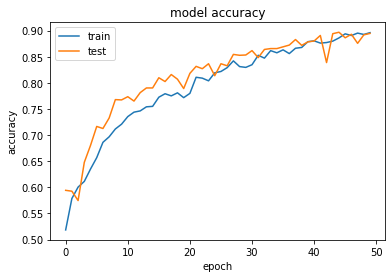

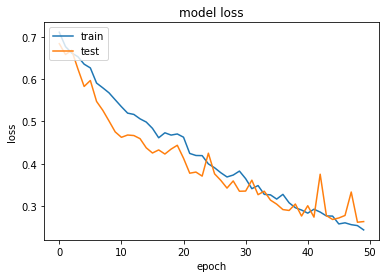

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

This code is used to plot the history of the accuracy and loss of a trained model. The history object is a dictionary containing the training and validation loss and accuracy values for each epoch of the model training.

The first block of code uses the plot() function of the matplotlib library to create a line plot of the training and validation accuracy over each epoch. The title(), ylabel(), xlabel(), and legend() functions are used to set the title, axis labels, and legend for the plot.

The second block of code uses the plot() function to create a line plot of the training and validation loss over each epoch. The same functions are used to set the title, axis labels, and legend for the plot.

By visualizing the history of the accuracy and loss during training, we can get insights into the performance of the model and identify any issues such as overfitting or underfitting. We want to see the training and validation accuracy increase and converge over time, while the loss decreases and stabilizes. If the validation accuracy stops improving or starts decreasing while the training accuracy is still improving, the model may be overfitting. If the training and validation accuracy are both low, the model may be underfitting.